<a href="https://colab.research.google.com/github/yashpatil454/Global_Terrorism_EDA_I_Team/blob/main/Team_Global_Terrorism_Analysis_Capstone_Project_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

#Goal of the Project:
The goal of this project was to understand and interpret the nature of terrorism efficiently and comprehensively with the use of data visualizations. A visualization which can be used to calculate the total number of attacks, total kill counts and location based on the selected region and year provides interactive interface to explore this dataset. Users can understand various patterns, trends and correlation in terrorism through visual interpretation and its provided explanation. 

#Feature Explanation:

* Eventid : Unique Id assigned to a terrorist attack.
* Year : Year of the attack
* Month : Month of the attack.
* Day : Day of the attack.
* Country : Country in which attack took place.
* Region : Region in which attack took place.
* Latitude : Latitude co-ordinate w.r.t to world map.
* Longitude : Longitude co-ordinate w.r.t to world map.
* Attack : Type of attack.
* Target : Targeted facility of the attack.
* Killed : Number of people killed in this attack.
* Wounded : Number of people wounded in this attack.
* Summary : Attack description in short.
* Groupname : Terrorist Group name.
* Target_type : Name of the Specific entity suffered by the attack.
* Weapon_type : Weapon type used by the terrorists.
* Motive : Reason behind the attack.
* Damages : Damages incurred in dollars($).
* Damage_txt : Scale of damage done(Minor, Major, Catastrophic)
* Suicide : Suicide number of terrorists.
* City : City in which attack took place.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud
import re
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
gt_df = pd.read_csv('/content/drive/MyDrive/EDA1/Global Terrorism Data.csv',encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#Data Pre-Processing


In [4]:
#Rename and extract useful columns for better understanding before getting in dataframe.
gt_df.rename(columns ={'iyear':'Year', 'imonth':'Month', 'iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'Attack','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group_name','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive','propvalue':'Damages','propextent_txt':'Damage_txt','suicide':'Suicide','city':'City'}, inplace = True)

In [5]:
#Keep Relevant columns only
gt_df = gt_df[['eventid','Year','Month','Day','Country','Region','latitude','longitude','Attack','Target','Killed','Wounded','Summary','Group_name','Target_type','Weapon_type','Motive','Damages','Damage_txt','Suicide','City']]

#Handling Missing Data

In [6]:
#This column shows us total no.of casualties in a particular attack
gt_df['Casualties'] = gt_df['Killed'] + gt_df['Wounded']

In [7]:
#Dropping datapoints/rows which have null values in latitude and longitude column for further visualisation.
gt_df.dropna(subset=['latitude','longitude'], inplace=True)

In [8]:
#Replacing -99 value for Damages column to drop rows for better visualisation.
gt_df['Damages'].replace([-99.0, np.nan], 0.0, inplace=True)
gt_df['Damage_txt'].replace('Unknown', np.nan, inplace=True)

In [9]:
# We have to remove Unknown values in Weapon_type column
gt_df.drop(gt_df.index[gt_df['Weapon_type'] == 'Unknown'], inplace=True)
gt_df.drop(gt_df.index[gt_df['City'] == 'Unknown'], inplace= True)

In [10]:
gt_df.isnull().sum()

eventid             0
Year                0
Month               0
Day                 0
Country             0
Region              0
latitude            0
longitude           0
Attack              0
Target            479
Killed           7197
Wounded         12365
Summary         53816
Group_name          0
Target_type         0
Weapon_type         0
Motive         110875
Damages             0
Damage_txt     115154
Suicide             0
City              387
Casualties      12791
dtype: int64

In [11]:
gt_df.head()

,eventid,Year,Month,Day,Country,Region,latitude,longitude,Attack,Target,...,Summary,Group_name,Target_type,Weapon_type,Motive,Damages,Damage_txt,Suicide,City,Casualties
3,197001000002,1970,1,0,Greece,Western Europe,37.997490,23.762728,Bombing/Explosion,U.S. Embassy,...,NaN,Unknown,Government (Diplomatic),Explosives,NaN,0.0,NaN,0,Athens,NaN
4,197001000003,1970,1,0,Japan,East Asia,33.580412,130.396361,Facility/Infrastructure Attack,U.S. Consulate,...,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,0.0,NaN,0,Fukouka,NaN
5,197001010002,1970,1,1,United States,North America,37.005105,-89.176269,Armed Assault,Cairo Police Headquarters,...,1/1/1970: Unknown African American assailants ...,Black Nationalists,Police,Firearms,To protest the Cairo Illinois Police Deparment,0.0,Minor (likely < $1 million),0,Cairo,0.0
6,197001020001,1970,1,2,Uruguay,South America,-34.891151,-56.187214,Assassination,Juan Maria de Lucah/Chief of Directorate of in...,...,NaN,Tupamaros (Uruguay),Police,Firearms,NaN,0.0,NaN,0,Montevideo,0.0
7,197001020002,1970,1,2,United States,North America,37.791927,-122.225906,Bombing/Explosion,Edes Substation,...,1/2/1970: Unknown perpetrators detonated explo...,Unknown,Utilities,Explosives,NaN,22500.0,Minor (likely < $1 million),0,Oakland,0.0


In [12]:
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156356 entries, 3 to 181690
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   eventid      156356 non-null  int64  
 1   Year         156356 non-null  int64  
 2   Month        156356 non-null  int64  
 3   Day          156356 non-null  int64  
 4   Country      156356 non-null  object 
 5   Region       156356 non-null  object 
 6   latitude     156356 non-null  float64
 7   longitude    156356 non-null  float64
 8   Attack       156356 non-null  object 
 9   Target       155877 non-null  object 
 10  Killed       149159 non-null  float64
 11  Wounded      143991 non-null  float64
 12  Summary      102540 non-null  object 
 13  Group_name   156356 non-null  object 
 14  Target_type  156356 non-null  object 
 15  Weapon_type  156356 non-null  object 
 16  Motive       45481 non-null   object 
 17  Damages      156356 non-null  float64
 18  Damage_txt   41202 non-n

In [13]:
#.T is used here to transpose the describe matrix.
gt_df.describe().T

,count,mean,std,min,25%,50%,75%,max
eventid,156356.0,2.003065e+11,1.317249e+09,1.970010e+11,1.991063e+11,2.009073e+11,2.014081e+11,2.017123e+11
Year,156356.0,2.002999e+03,1.317264e+01,1.970000e+03,1.991000e+03,2.009000e+03,2.014000e+03,2.017000e+03
Month,156356.0,6.464709e+00,3.387821e+00,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,1.200000e+01
Day,156356.0,1.553082e+01,8.802133e+00,0.000000e+00,8.000000e+00,1.500000e+01,2.300000e+01,3.100000e+01
latitude,156356.0,2.381092e+01,1.871223e+01,-5.315461e+01,1.184093e+01,3.163108e+01,3.473357e+01,7.463355e+01
longitude,156356.0,-5.229057e+02,2.179611e+05,-8.618590e+07,4.835659e+00,4.338168e+01,6.886092e+01,1.784419e+02
Killed,149159.0,2.285957e+00,1.123002e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.570000e+03
Wounded,143991.0,3.408282e+00,3.843116e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,8.191000e+03
Damages,156356.0,5.008761e+04,7.748061e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.700000e+09
Suicide,156356.0,4.123922e-02,1.988437e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


# Preparing a Fun Word cloud for Most affacted Indian Cities 

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


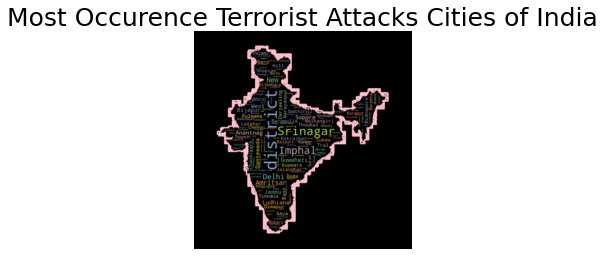

In [14]:
# Make dataframe of India country
India_df = gt_df[gt_df['Country'] == 'India']

# Drop unknown values from the Indian city column 
India_df.drop(India_df.index[India_df['City'] == 'Unknown'], inplace=True)

#Creating the text variable
text = India_df['City']
text = text.to_string()
text = re.sub(' +',' ',text)
mask = np.array(Image.open("/content/drive/MyDrive/EDA1/india map.png"))

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'black', max_words=1000, mask=mask,contour_color='#FFC0CB',contour_width=2,colormap='Set2').generate(text)
plt.figure()
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig("cloud.png", format="png")
plt.margins(x=0,y=0)
plt.title('Most Occurence Terrorist Attacks Cities of India', fontsize = 25)
plt.show()

# Plotting areas on worldmap to better visualize areas prone to frequent terrorist attacks!!!

In [15]:
#Creating a location co-ordinates df
loc_df = gt_df[['latitude','longitude','Country']].value_counts()[:500].reset_index()
loc_df.rename(columns = {0:'Attack_count'}, inplace = True)

In [16]:
#Plotting scatter plot on world map with the help of plotly express
fig = px.scatter_geo(loc_df,lat='latitude',lon='longitude', hover_name='Country', color = 'Country')
fig.update_layout(title = 'Terrorist Attacks on World Map', title_x=0.4,height=500, margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

** Note: Adding a png of the visualization as it is not visible on github. **
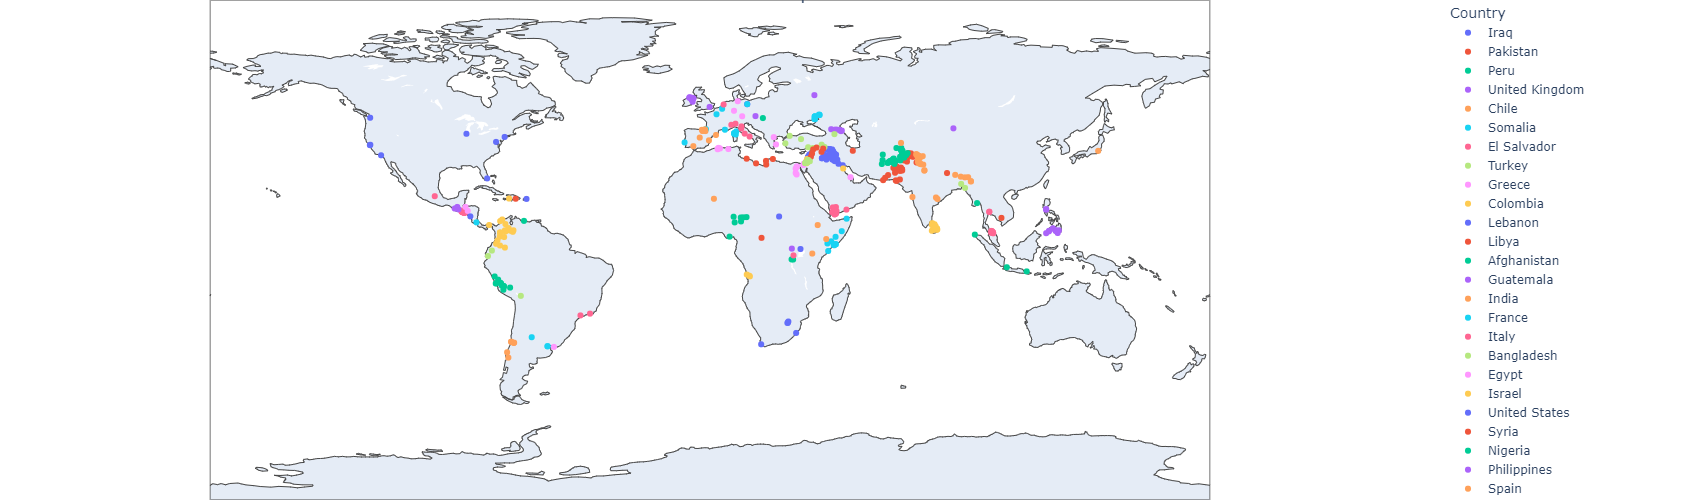
Inference:
Plotting the attack cooridinates on worldmap we can figure out by densely populated marker, which country is highly prone to terrorist attacks! We can see that countries like Pakistan, Afghanistan, Colombia, Somalia, Iraq and etc. have high number of Terrorist Attacks.

#Terrorism Analysis in India Between 1970 to 2017

In [17]:
India = gt_df[gt_df.Country == 'India']
India_cities = India.groupby(by='City',as_index=False).count().sort_values(by='eventid',ascending=False).iloc[:5,]

India_suicide_size = India['Suicide'].sum() / len(India)
labels = ['Suicide', 'Not Suicide']

India_year = India.groupby(by='Year', as_index=False).sum().loc[:, ['Year', 'Killed']]

India_weapon = India.groupby(by='Weapon_type',as_index=False).count()[:8].sort_values(by='eventid',ascending=False).iloc[:,:2]


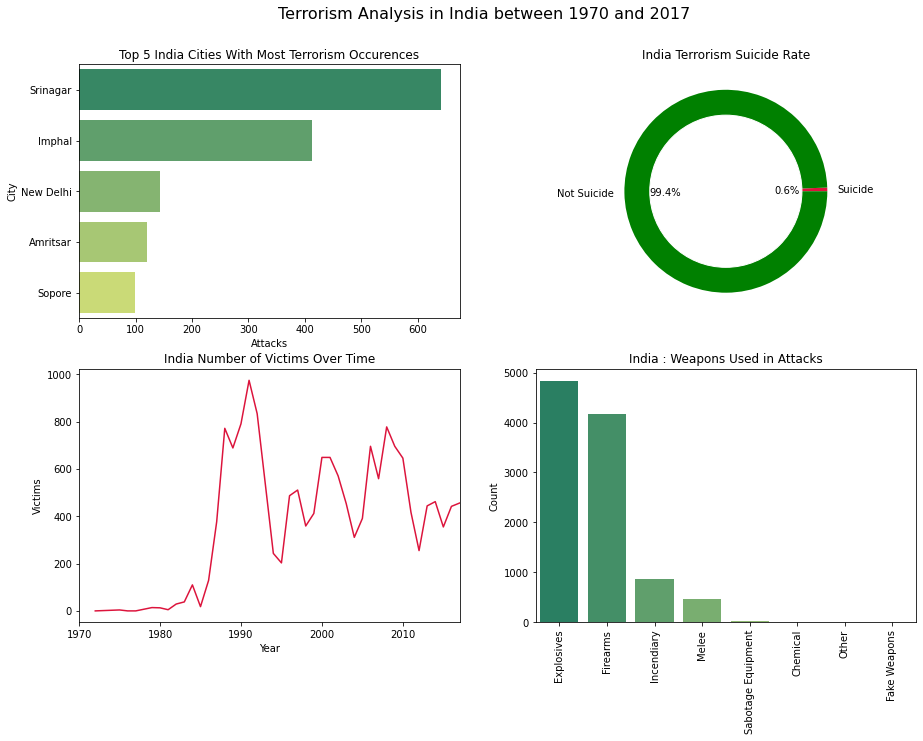

In [18]:
ig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Plot 1 - Top 5 terrorism cities    
sns.barplot(x='eventid', y='City', data=India_cities, ci=None, ax=axs[0, 0],palette='summer')
axs[0, 0].set_title(f'Top 5 India Cities With Most Terrorism Occurences')
axs[0, 0].set_ylabel('City')
axs[0, 0].set_xlabel('Attacks')

# Plot 2 - Suicide Rate
center_circle = plt.Circle((0,0), 0.75, color='white')
axs[0, 1].pie((India_suicide_size, 1-India_suicide_size), labels=labels,colors=['crimson','green'] , autopct='%1.1f%%')
axs[0, 1].add_artist(center_circle)
axs[0, 1].set_title('India Terrorism Suicide Rate')

# Plot 3 - Victims through the years
sns.lineplot(x='Year', y='Killed', data=India_year, ax=axs[1, 0],color='crimson')
axs[1, 0].set_xlim([1970, 2017])
axs[1, 0].set_title('India Number of Victims Over Time')
axs[1, 0].set_ylabel('Victims')

# Plot 4 - Terrorism Weapons
sns.barplot(x='Weapon_type', y='eventid', data=India_weapon, ci=None, ax=axs[1, 1],palette='summer')
axs[1, 1].set_xticklabels(axs[1, 1].get_xticklabels(), rotation=90)
axs[1, 1].set_xlabel('')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_title('India : Weapons Used in Attacks')

plt.suptitle('Terrorism Analysis in India between 1970 and 2017', size=16)    
plt.subplots_adjust(top=0.90)
plt.show()

#Inference:
Terrorism Analysis in India Between 1970 to 2017 analysis shows us that most terror attack was takes place in Shrinagar.In the decade 1980-90 there are most casualties that's why victim rate is much high in this decade, but sucide rate of India is negligible through all years. Bombings and explosives is the main weapontype of terrorist, in India most of attacks are done by bombings and explosives.

#Visualizing Top 3 Regions and Target_type affected during the years.

In [19]:
#Making a list of top 3 Regions and Target_type
region_li = list(gt_df['Region'].value_counts()[:3].reset_index()['index'])
print(region_li)
target_type_li = list(gt_df['Target_type'].value_counts()[:3].reset_index()['index'])
print(target_type_li)

['Middle East & North Africa', 'South Asia', 'South America']
['Private Citizens & Property', 'Military', 'Police']


In [20]:
#Data-Processing to get the desired data
def processing():
  li = []
  for i in range(1,4):
    for j in range(1,4):
      res = gt_df.loc[(gt_df['Region'] == region_li[i-1]) & (gt_df['Target_type'] == target_type_li[j-1])]['Year'].value_counts().reset_index()
      res.rename(columns = {'index':'year','Year':'count'}, inplace = True)
      res.sort_values(by='year',inplace=True)
      x = res['year'].tolist()
      y = res['count'].tolist()
      r = region_li[i-1]
      t = target_type_li[j-1]
      li.append([x,y,r,t])
  return li

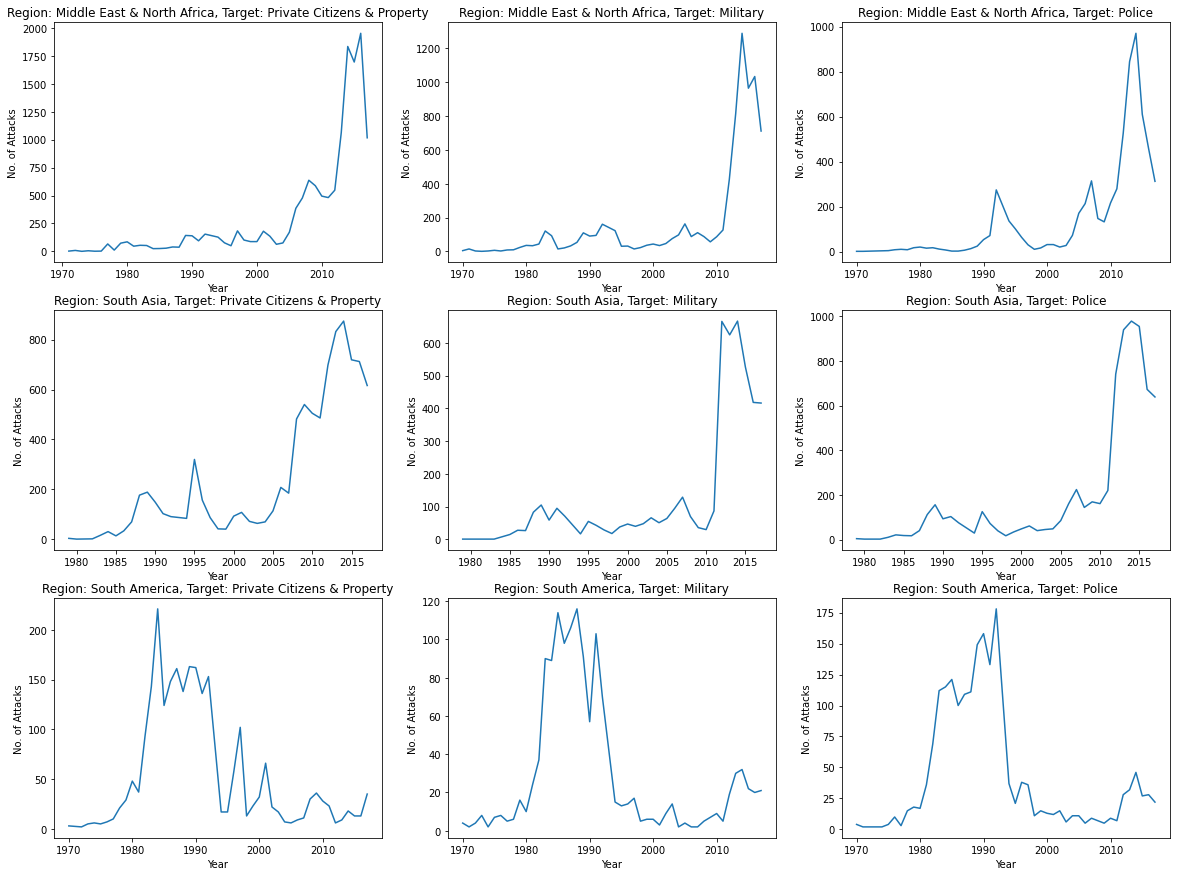

In [21]:
#Plotting the processed data into subplot
plt.figure(figsize=(20,15))
li = processing()

for i in range(9):
  x = li[i][0]
  y = li[i][1]
  plt.subplot(3, 3, i+1)
  plt.plot(x, y)
  plt.title("Region: {0}, Target: {1}".format(li[i][2],li[i][3]))
  plt.xlabel('Year')
  plt.ylabel('No. of Attacks')

#Inference: 
By Visualizing top targets attacked by terrorists with top regions affected we can figure out the trend of the attacks conducted by terrorists over the years. 

We can understand from Subplot(1,1) that in 1900’s the terrorist attacks where much lower than what can we see after the 2000’s. We can also deduce that the terrorist attacks where on Private Citizens and Property and also on their Military Facilities.

#Terrorism by Country and Region.





Country with Highest Terrorist Attack is Iraq
Region with Highest Terrorist Attack is Middle East & North Africa
Maximum People killed in an attack are 1570.0 that took place in Iraq


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



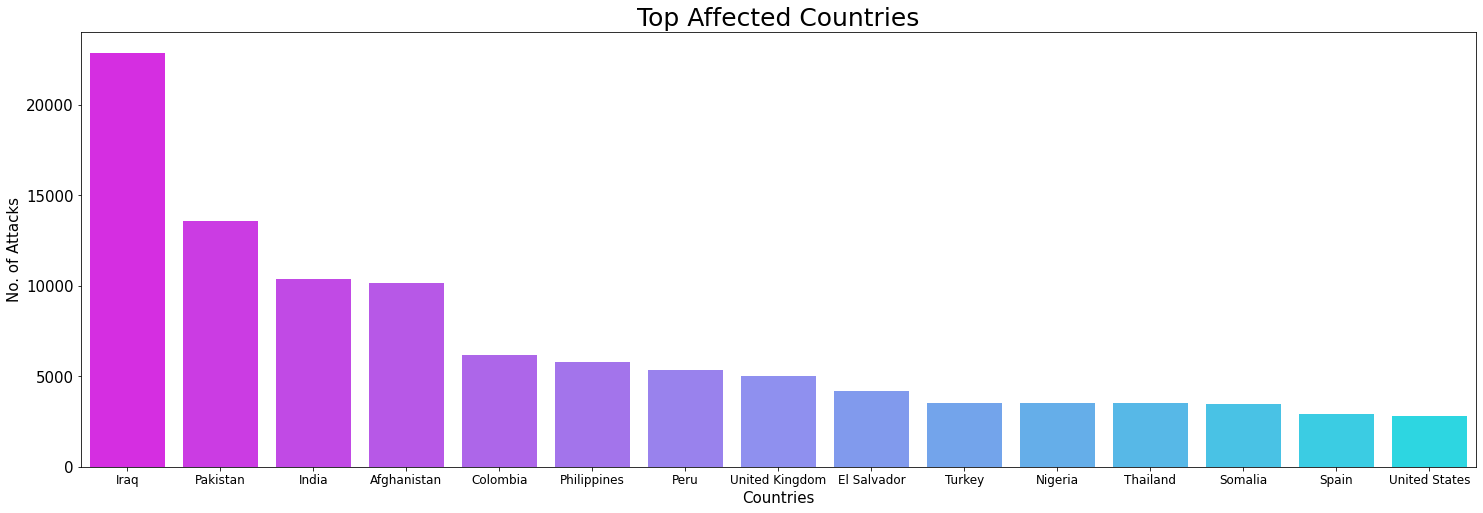

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



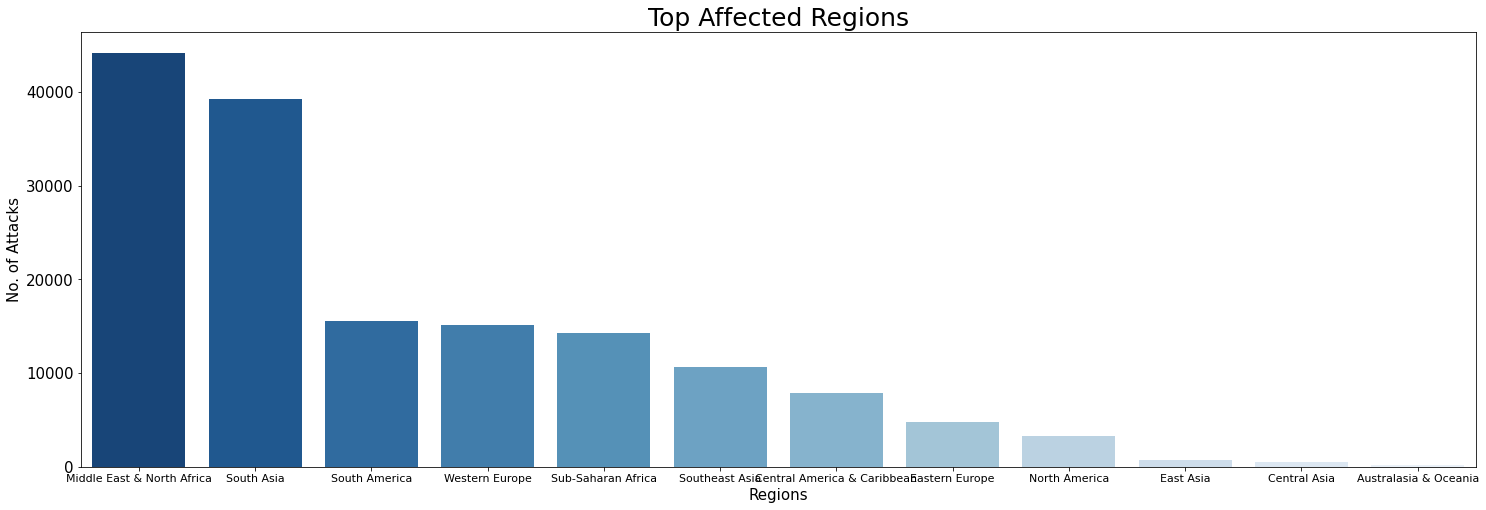

In [22]:
#Country and region with highest terror attack rate.
max_terror_attack_country = gt_df['Country'].value_counts().index[0]
print(f'Country with Highest Terrorist Attack is {max_terror_attack_country}')

max_terror_attack_region =gt_df['Region'].value_counts().index[0]
print(f'Region with Highest Terrorist Attack is {max_terror_attack_region}')

#Maximum number of People died in this attack.
print('Maximum People killed in an attack are', gt_df['Killed'].max(),'that took place in',gt_df.loc[gt_df['Killed'].idxmax()].Country)

#Terrorism by Country
plt.subplots(figsize=(25,8))
sns.barplot(gt_df['Country'].value_counts()[:15].index,gt_df['Country'].value_counts()[:15].values,palette ='cool_r')
plt.xticks(fontsize = 12)
plt.yticks(fontsize=15)
plt.title('Top Affected Countries',fontsize = 25)
plt.xlabel('Countries',fontsize = 15)
plt.ylabel('No. of Attacks',fontsize = 15)
plt.show()

#Terrorism by Region
plt.subplots(figsize=(25,8))
sns.barplot(gt_df['Region'].value_counts()[:15].index,gt_df['Region'].value_counts()[:15].values,palette ='Blues_r')
plt.xticks(fontsize = 11)
plt.yticks(fontsize=15)
plt.title('Top Affected Regions',fontsize = 25)
plt.xlabel('Regions',fontsize = 15)
plt.ylabel('No. of Attacks',fontsize = 15)
plt.show()

#Inference:
Figures shows the most affected country is Iraq and people killed in this attack are 1570, maximum number of people are killed in this attack. After that Pakistan, Afghanistan, India these countries are affected. and top affected regions are Middle East & North Africa and South Asia based on the total number of attacks.

# **Number Of Attacks Per Weapon**

In [23]:
# There is no null values. Now check unique values so that we can check there is any unneccery values to drop or not
gt_df['Weapon_type'].unique()

array(['Explosives', 'Incendiary', 'Firearms', 'Chemical', 'Melee',
       'Sabotage Equipment',
       'Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)',
       'Fake Weapons', 'Radiological', 'Other', 'Biological'],
      dtype=object)

In [24]:
weapon_df = gt_df.groupby(['Weapon_type'])['Weapon_type'].count()

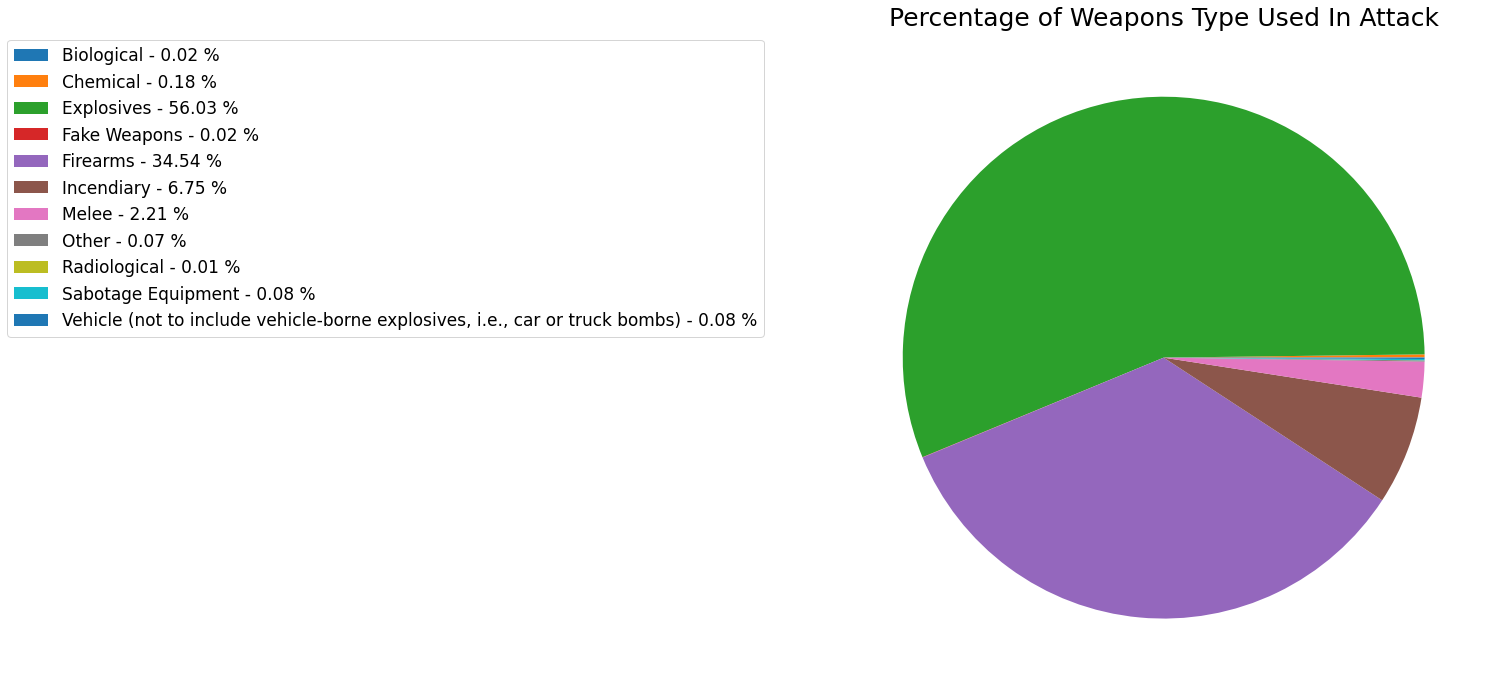

In [25]:
# Draw pie chart for 
plt.figure(figsize=(15,12))
data = weapon_df
label = weapon_df.index
percent = 100.*data/data.sum()
plt.pie(data)

#Making customized legend by editing labels
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(label, percent)]
plt.legend(labels, bbox_to_anchor=(-0.1,1), fontsize=17)
plt.title('Percentage of Weapons Type Used In Attack', fontsize = 25)
plt.show()

#Inference:
From above pie chart we can see that terrorists mostly use explosive, firearms and incendiary weapon type.

# Number Of Attacks Every Year By Top 10 Active Terrorist Group

In [26]:
# Filter top 10 terrorist group in Dataframe.
attack_by_grp=gt_df['Group_name'].value_counts()
top_attack_group = attack_by_grp[1:11]  # start indexing from 1 because at zeroth indexing there are unknown terrorist groups
grp_name = top_attack_group.index
top_attack_grp = gt_df[gt_df['Group_name'].isin(grp_name)]

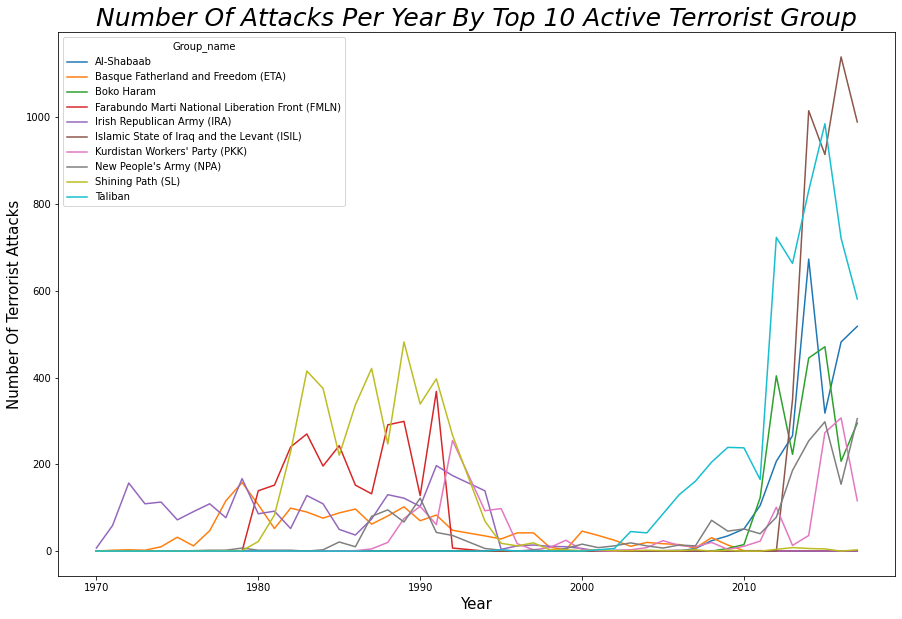

In [27]:
# Make another Dataframe named tag_df with two columns, Year and number of attacks by top 10 groups and unstack it.
tag_df = top_attack_grp.groupby(['Year', 'Group_name'])['Group_name'].count().unstack()
tag_df.fillna(0, inplace = True)

# Plot a line graph between years and number of terrorist attacks by top 10 terrorist group
plt.rcParams['figure.figsize'] = (15,10)
tag_df.plot(kind = 'line')
plt.title('Number Of Attacks Per Year By Top 10 Active Terrorist Group', fontsize=25, Style='oblique')
plt.ylabel('Number Of Terrorist Attacks',fontsize=15)
plt.xlabel('Year', fontsize=15)
plt.show()

#Inference:
From above line chart we can see the number of terror attacks by top 10 terrorist groups from 1970 to 2017. 
Here we can see how Taliban rapidly grow in terror activities from 2003 to 2017.
Shining path terrorist group started their terror activities from 1979 and had been worked since 1995. After that thier activities are not that much.

#Conclusion:
Strategic intelligence gives an insight into terrorist intent, capability Useful in prioritising risks and developing preventative measures.Also helpful in focusing on key vulnerabilities.

A visualization which can be used to calculate the total number of attacks, total kill counts and location based on the selected region and year provides interactive interface to explore this dataset. Users can understand various patterns, trends and correlation in terrorism through visual interpretation and its provided explanation. 

This work can be used by curious civilians, security related policy-makers, international organizations hosting worldwide events, foreign investors and academic researchers for the purpose of understanding terrorism and its nature.